# 1. Libraries and settings

In [1]:
import pandas as pd
import numpy as np
import math
import sklearn
import sklearn.preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report
import seaborn as sns
import datetime
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape, GlobalAveragePooling1D
from keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D
from keras.utils import np_utils


#display parent directory and working directory
print(os.path.dirname(os.getcwd())+':', os.listdir(os.path.dirname(os.getcwd())));
print(os.getcwd()+':', os.listdir(os.getcwd()));

d:\programfiles\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
d:\programfiles\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
d:\programfiles\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
d:\programfiles\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passi

D:\Value of Dream\108-1 深度學習\Deep Learning Tool\CNN\NYSE Stock: ['Categorical Dependent Variable', 'Continuous Dependent Variable']
D:\Value of Dream\108-1 深度學習\Deep Learning Tool\CNN\NYSE Stock\Categorical Dependent Variable: ['.ipynb_checkpoints', 'CNN1D for categorical y.ipynb', 'CNN1D for categorical y.pdf', 'CNN2D for categorical y .ipynb', 'CNN2D for categorical y.pdf']


Using TensorFlow backend.


# 2. Analyze Data

In [2]:
df = pd.read_csv("D:/Value of Dream/108-1 深度學習/Deep Learning Tool/Data/prices-split-adjusted.csv", index_col = 0)
print(df.info())
print(df.head())
print(df.values.shape)
# number of different stocks
print('\nnumber of different stocks: ', len(list(set(df.symbol))))
print(list(set(df.symbol))[:10])

<class 'pandas.core.frame.DataFrame'>
Index: 851264 entries, 2016-01-05 to 2016-12-30
Data columns (total 6 columns):
symbol    851264 non-null object
open      851264 non-null float64
close     851264 non-null float64
low       851264 non-null float64
high      851264 non-null float64
volume    851264 non-null float64
dtypes: float64(5), object(1)
memory usage: 45.5+ MB
None
           symbol        open       close         low        high     volume
date                                                                        
2016-01-05   WLTW  123.430000  125.839996  122.309998  126.250000  2163600.0
2016-01-06   WLTW  125.239998  119.980003  119.940002  125.540001  2386400.0
2016-01-07   WLTW  116.379997  114.949997  114.930000  119.739998  2489500.0
2016-01-08   WLTW  115.480003  116.620003  113.500000  117.440002  2006300.0
2016-01-11   WLTW  117.010002  114.970001  114.089996  117.330002  1408600.0
(851264, 6)

number of different stocks:  501
['NUE', 'CHK', 'AEE', 'COF', 'BCR', 

In [3]:
df.tail()

,symbol,open,close,low,high,volume
date,,,,,,
2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
2016-12-30,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0
2016-12-30,FTV,54.200001,53.630001,53.389999,54.480000,705100.0


In [4]:
df.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,64.993618,65.011913,64.336541,65.639748,5.415113e+06
std,75.203893,75.201216,74.459518,75.906861,1.249468e+07
min,1.660000,1.590000,1.500000,1.810000,0.000000e+00
25%,31.270000,31.292776,30.940001,31.620001,1.221500e+06
50%,48.459999,48.480000,47.970001,48.959999,2.476250e+06
75%,75.120003,75.139999,74.400002,75.849998,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


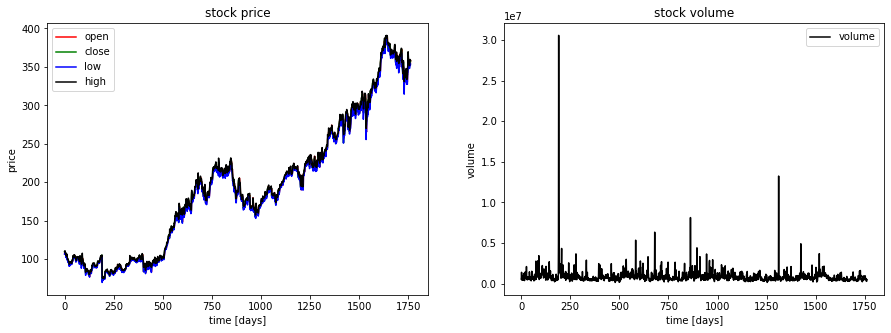

In [5]:
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);
plt.plot(df[df.symbol == 'EQIX'].open.values, color='red', label='open')
plt.plot(df[df.symbol == 'EQIX'].close.values, color='green', label='close')
plt.plot(df[df.symbol == 'EQIX'].low.values, color='blue', label='low')
plt.plot(df[df.symbol == 'EQIX'].high.values, color='black', label='high')
plt.title('stock price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')
#plt.show()

plt.subplot(1,2,2);
plt.plot(df[df.symbol == 'EQIX'].volume.values, color='black', label='volume')
plt.title('stock volume')
plt.xlabel('time [days]')
plt.ylabel('volume')
plt.legend(loc='best');

# 3. Manipulate data 
- choose a specific stock
- drop feature: volume
- normalize stock data
- create train and test data sets

In [6]:
def feature_normalize(train):
    train_norm = train.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))  #標準化(介於0~1之間)
    return train_norm

In [7]:
## 很重要  切割視窗
def create_segments_and_labels(df, time_steps, step):#, label_name):
    """
    This function receives a dataframe and returns the reshaped segments
    of x,y,z acceleration as well as the corresponding labels
    Args:
        df: Dataframe in the expected format
        time_steps: Integer value of the length of a segment that is created
    Returns:
        reshaped_segments
        labels:
    """

#feature 有四個
    N_FEATURES = 4
#選擇測試切出20%
    test_set_size_percentage = 20
    segments = []
    labels = []
    
#     data_raw = df.as_matrix()
#創造時間窗，將所有選擇特徵一起切割視窗
    for i in range(0, len(df) - time_steps, step):#
        segments.append(df.values[i: i + time_steps])
#以當期四種特徵預測下一期收盤價
        rate = (df.open.values[i + time_steps]-df.open.values[i + time_steps-1])/df.open.values[i + time_steps-1]
        temp = rate
        if temp < 0:
            if temp <= -0.2:
                label =0
            elif temp <= -0.1:
                label =1
            elif temp < 0:
                label =2
        else:
            if temp == 0:
                label =3
            elif temp <= 0.1:
                label =4
            elif temp <= 0.2:
                label =5                
            elif temp >0.2:
                label =6              
        labels.append([label])
    test_set_size = np.round(test_set_size_percentage/100*np.asarray(segments).shape[0])
    train_set_size = int(np.asarray(segments).shape[0] - (test_set_size));  
    print(train_set_size)
#     segments = np.array(segments);
    reshaped_segments_train = np.asarray(segments[:train_set_size], dtype= np.float32).reshape(-1, time_steps, N_FEATURES)
    reshaped_segments_test = np.asarray(segments[train_set_size:], dtype= np.float32).reshape(-1, time_steps, N_FEATURES)
    labels_train = np.asarray(labels[:train_set_size])
    labels_test = np.asarray(labels[train_set_size:])
#以訓練資料占比分割訓練測試集，並以視窗最後一筆資料當作預測值
#     x_train = segments[:train_set_size,:,:]#(1394, 19, 4)
#     y_train = lables[:train_set_size,-1,:]#(1394, 4)
#     x_valid = data[train_set_size:train_set_size+valid_set_size,:-1,:]
#     y_valid = data[train_set_size:train_set_size+valid_set_size,-1,:]
#     x_test = segments[train_set_size:,:-1,:]
#     y_test = segments[train_set_size:,-1,:]    
    return reshaped_segments_train, labels_train, reshaped_segments_test,labels_test
#     return [x_train, y_train, x_valid, y_valid, x_test, y_test]


In [8]:
# choose one stock & drop volume
df_stock = df[df.symbol == 'EQIX'].copy()
df_stock.drop(['symbol'],1,inplace=True)
df_stock.drop(['volume'],1,inplace=True)

cols = list(df_stock.columns.values)
print('df_stock.columns.values = ', cols)

# normalize stock
df_stock_norm = df_stock.copy()
df_stock_norm = feature_normalize(df_stock_norm)

# create train, test data
time_steps = 20 # choose sequence length
step = 5
x_train, y_train, x_test, y_test = create_segments_and_labels(df_stock_norm, time_steps, step)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ', y_test.shape)
num_classes = 7
y_train_oneshot = np_utils.to_categorical(y_train, num_classes)
print(f"y_train_oneshot:{y_train_oneshot.shape}")
y_test_oneshot = np_utils.to_categorical(y_test, num_classes)
print(f"y_test_oneshot:{y_test_oneshot.shape}")

df_stock.columns.values =  ['open', 'close', 'low', 'high']
279
x_train.shape =  (279, 20, 4)
y_train.shape =  (279, 1)
x_test.shape =  (70, 20, 4)
y_test.shape =  (70, 1)
y_train_oneshot:(279, 7)
y_test_oneshot:(70, 7)


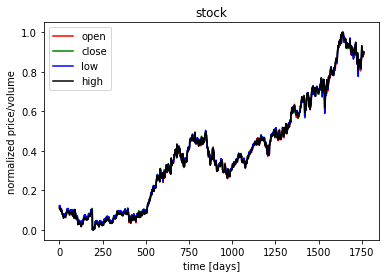

In [9]:
plt.plot(df_stock_norm.open.values, color='red', label='open')
plt.plot(df_stock_norm.close.values, color='green', label='close')
plt.plot(df_stock_norm.low.values, color='blue', label='low')
plt.plot(df_stock_norm.high.values, color='black', label='high')
#plt.plot(df_stock_norm.volume.values, color='gray', label='volume')
plt.title('stock')
plt.xlabel('time [days]')
plt.ylabel('normalized price/volume')
plt.legend(loc='best')
plt.show()

In [10]:
num_time_periods, num_sensors = x_train.shape[1], x_train.shape[2]
input_shape = (num_time_periods*num_sensors)   ## 80*3  每一筆資料 80(時間窗) 3個變數( xyz) 
x_train_reshape = x_train.reshape(x_train.shape[0], input_shape).astype('float32')
print(f"x_train_reshape.shape:{x_train_reshape.shape}")
x_test_reshape = x_test.reshape(x_test.shape[0], input_shape).astype('float32')
print(f"x_test_reshape.shape:{x_test_reshape.shape}")

x_train_reshape.shape:(279, 80)
x_test_reshape.shape:(70, 80)


# CNN 2D

In [11]:
# %%

print("\n--- Create neural network model ---\n")

input_shape = (x_train.shape[1], x_train.shape[2], 1)  ##  定義  CNN 的輸入維度!! (10*10)


# 建立簡單的線性執行的模型
# model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(1,28,28), data_format='channels_first'))
model_cnn2d = Sequential()
# 建立卷積層，filter=32,即 output space 的深度, Kernal Size: 3x3, activation function 採用 relu
model_cnn2d.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))  ## 注意喔!!  這一邊放的是 (10,10,1) 的型態
# 建立卷積層，filter=64,即 output size, Kernal Size: 3x3, activation function 採用 relu
# model.add(Conv2D(64, (3, 3), activation='relu'))
# 建立池化層，池化大小=2x2，取最大值
model_cnn2d.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout層隨機斷開輸入神經元，用於防止過度擬合，斷開比例:0.25
model_cnn2d.add(Dropout(0.25))
# Flatten層把多維的輸入一維化，常用在從卷積層到全連接層的過渡。
model_cnn2d.add(Flatten())
# 全連接層: 128個output
model_cnn2d.add(Dense(128, activation='relu'))
# Dropout層隨機斷開輸入神經元，用於防止過度擬合，斷開比例:0.5
model_cnn2d.add(Dropout(0.5))
# 使用全連接層 softmax activation function，將結果分類
model_cnn2d.add(Dense(num_classes, activation='softmax'))

# 編譯: 選擇損失函數、優化方法及成效衡量方式
model_cnn2d.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

model_cnn2d.summary() 
# x_train.reshape(x_train.shape[0], input_shape).astype('float32')
x_train_2D = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1).astype('float32')
x_test_2D = x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1).astype('float32')

# 進行訓練, 訓練過程會存在 train_history 變數中
# 定義梯度下降批量
# batch_size = 10
# 定義分類數量 (y的數量)
num_classes = 7
# 定義訓練週期 (epochs的值不能太大)
# epochs = 25
from keras.callbacks import ReduceLROnPlateau
learning_rate_function = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, #準確率重複3次就要減少
                                            verbose=1, 
                                            factor=0.5, #準確率乘上factor設成下一個learning_rate
                                            min_lr=0.00001) #降


#train_history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.2)
# train_history = model.fit(x_train_2D, y_train_oneshot, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_val,y_val))
train_history = model_cnn2d.fit(x_train_2D, y_train_oneshot, validation_split=0.2, epochs=300, batch_size=50,callbacks = [learning_rate_function], verbose=1)


--- Create neural network model ---

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 18, 2, 32)         320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 1, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 9, 1, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 288)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               36992     
_________________________________________________

Epoch 39/300
223/223 [==============================] - 0s 76us/step - loss: 1.0401 - acc: 0.4619 - val_loss: 0.6937 - val_acc: 0.5357
Epoch 40/300
223/223 [==============================] - 0s 72us/step - loss: 1.0467 - acc: 0.4888 - val_loss: 0.6937 - val_acc: 0.5357

Epoch 00040: ReduceLROnPlateau reducing learning rate to 0.0001220703125.
Epoch 41/300
223/223 [==============================] - 0s 76us/step - loss: 1.0289 - acc: 0.4305 - val_loss: 0.6937 - val_acc: 0.5357
Epoch 42/300
223/223 [==============================] - 0s 76us/step - loss: 1.0372 - acc: 0.4798 - val_loss: 0.6937 - val_acc: 0.5357
Epoch 43/300
223/223 [==============================] - 0s 76us/step - loss: 1.0235 - acc: 0.5157 - val_loss: 0.6937 - val_acc: 0.5357

Epoch 00043: ReduceLROnPlateau reducing learning rate to 6.103515625e-05.
Epoch 44/300
223/223 [==============================] - 0s 72us/step - loss: 1.0595 - acc: 0.4574 - val_loss: 0.6937 - val_acc: 0.5357
Epoch 45/300
223/223 [==================

Epoch 97/300
223/223 [==============================] - 0s 89us/step - loss: 1.0281 - acc: 0.4798 - val_loss: 0.6937 - val_acc: 0.5357
Epoch 98/300
223/223 [==============================] - 0s 81us/step - loss: 1.0259 - acc: 0.4664 - val_loss: 0.6937 - val_acc: 0.5357
Epoch 99/300
223/223 [==============================] - 0s 80us/step - loss: 1.0540 - acc: 0.4574 - val_loss: 0.6937 - val_acc: 0.5357
Epoch 100/300
223/223 [==============================] - 0s 76us/step - loss: 1.0192 - acc: 0.4664 - val_loss: 0.6937 - val_acc: 0.5357
Epoch 101/300
223/223 [==============================] - 0s 76us/step - loss: 1.0410 - acc: 0.5112 - val_loss: 0.6937 - val_acc: 0.5357
Epoch 102/300
223/223 [==============================] - 0s 76us/step - loss: 1.0364 - acc: 0.4888 - val_loss: 0.6937 - val_acc: 0.5357
Epoch 103/300
223/223 [==============================] - 0s 76us/step - loss: 1.0299 - acc: 0.4619 - val_loss: 0.6937 - val_acc: 0.5357
Epoch 104/300
223/223 [============================

223/223 [==============================] - 0s 85us/step - loss: 1.0490 - acc: 0.4619 - val_loss: 0.6937 - val_acc: 0.5357
Epoch 158/300
223/223 [==============================] - 0s 81us/step - loss: 1.0407 - acc: 0.4529 - val_loss: 0.6937 - val_acc: 0.5357
Epoch 159/300
223/223 [==============================] - 0s 89us/step - loss: 1.0707 - acc: 0.4215 - val_loss: 0.6937 - val_acc: 0.5357
Epoch 160/300
223/223 [==============================] - 0s 83us/step - loss: 1.0242 - acc: 0.5112 - val_loss: 0.6937 - val_acc: 0.5357
Epoch 161/300
223/223 [==============================] - 0s 81us/step - loss: 1.0787 - acc: 0.3946 - val_loss: 0.6937 - val_acc: 0.5357
Epoch 162/300
223/223 [==============================] - 0s 81us/step - loss: 1.0536 - acc: 0.4439 - val_loss: 0.6937 - val_acc: 0.5357
Epoch 163/300
223/223 [==============================] - 0s 76us/step - loss: 1.0756 - acc: 0.4529 - val_loss: 0.6937 - val_acc: 0.5357
Epoch 164/300
223/223 [==============================] - 0s 81

223/223 [==============================] - 0s 79us/step - loss: 1.0432 - acc: 0.4933 - val_loss: 0.6937 - val_acc: 0.5357
Epoch 218/300
223/223 [==============================] - 0s 89us/step - loss: 1.0307 - acc: 0.4888 - val_loss: 0.6937 - val_acc: 0.5357
Epoch 219/300
223/223 [==============================] - 0s 80us/step - loss: 1.0216 - acc: 0.5202 - val_loss: 0.6937 - val_acc: 0.5357
Epoch 220/300
223/223 [==============================] - 0s 89us/step - loss: 1.0225 - acc: 0.4843 - val_loss: 0.6937 - val_acc: 0.5357
Epoch 221/300
223/223 [==============================] - 0s 89us/step - loss: 1.0462 - acc: 0.4439 - val_loss: 0.6937 - val_acc: 0.5357
Epoch 222/300
223/223 [==============================] - 0s 85us/step - loss: 1.0323 - acc: 0.4753 - val_loss: 0.6937 - val_acc: 0.5357
Epoch 223/300
223/223 [==============================] - 0s 98us/step - loss: 1.0450 - acc: 0.4395 - val_loss: 0.6937 - val_acc: 0.5357
Epoch 224/300
223/223 [==============================] - 0s 94

223/223 [==============================] - 0s 81us/step - loss: 1.0568 - acc: 0.4753 - val_loss: 0.6937 - val_acc: 0.5357
Epoch 278/300
223/223 [==============================] - 0s 89us/step - loss: 1.0588 - acc: 0.4260 - val_loss: 0.6937 - val_acc: 0.5357
Epoch 279/300
223/223 [==============================] - 0s 76us/step - loss: 1.0516 - acc: 0.5112 - val_loss: 0.6937 - val_acc: 0.5357
Epoch 280/300
223/223 [==============================] - 0s 76us/step - loss: 1.0195 - acc: 0.5112 - val_loss: 0.6937 - val_acc: 0.5357
Epoch 281/300
223/223 [==============================] - 0s 76us/step - loss: 1.0382 - acc: 0.4664 - val_loss: 0.6937 - val_acc: 0.5357
Epoch 282/300
223/223 [==============================] - 0s 76us/step - loss: 1.0778 - acc: 0.4036 - val_loss: 0.6937 - val_acc: 0.5357
Epoch 283/300
223/223 [==============================] - 0s 76us/step - loss: 1.0494 - acc: 0.4439 - val_loss: 0.6937 - val_acc: 0.5357
Epoch 284/300
223/223 [==============================] - 0s 76

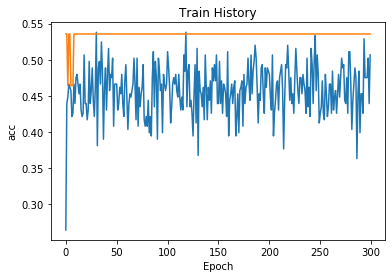

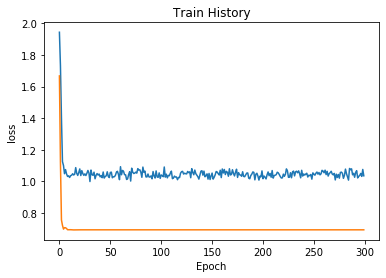

In [12]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title("Train History")
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.show()

show_train_history(train_history, "acc", "val_acc") ## 訓練正確率圖

show_train_history(train_history, "loss", "val_loss") ## 訓練誤差圖

In [13]:
score = model_cnn2d.evaluate(x_test_2D, y_test_oneshot, verbose=1)

print("\nAccuracy on test data: %0.2f" % score[1])
print("\nLoss on test data: %0.2f" % score[0])

70/70 [==============================] - 0s 56us/step

Accuracy on test data: 0.60

Loss on test data: 0.69
